# Code Adapted From https://huggingface.co/learn/diffusion-course/en/unit1/1

## Pre-Train

### Simple Model with Hugging Face Libraries

In [1]:
import numpy as np
import torch
import torch.nn.functional as F
from matplotlib import pyplot as plt
from PIL import Image


def show_images(x):
    """Given a batch of images x, make a grid and convert to PIL"""
    x = x * 0.5 + 0.5  # Map from (-1, 1) back to (0, 1)
    grid = torchvision.utils.make_grid(x)
    grid_im = grid.detach().cpu().permute(1, 2, 0).clip(0, 1) * 255
    grid_im = Image.fromarray(np.array(grid_im).astype(np.uint8))
    return grid_im


def make_grid(images, size=64):
    """Given a list of PIL images, stack them together into a line for easy viewing"""
    output_im = Image.new("RGB", (size * len(images), size))
    for i, im in enumerate(images):
        output_im.paste(im.resize((size, size)), (i * size, 0))
    return output_im


# Mac users may need device = 'mps' (untested)
device = torch.device("mps" if torch.mps.is_available() else "cpu")

In [13]:
# Example
# from diffusers import StableDiffusionPipeline
# model_id = "sd-dreambooth-library/mr-potato-head"
# pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16).to(device)
# prompt = "an abstract oil painting of sks mr potato head by picasso"
# image = pipe(prompt, num_inference_steps=50, guidance_scale=7.5).images[0]
# image

model_index.json:   0%|          | 0.00/546 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

text_encoder/config.json:   0%|          | 0.00/589 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/289 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/794 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/805 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/608M [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/246M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/597 [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/167M [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.67k [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

An error occurred while trying to fetch /Users/erict/.cache/huggingface/hub/models--sd-dreambooth-library--mr-potato-head/snapshots/34246b94acd8b96166e8d93eaded001c380a2d4e/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /Users/erict/.cache/huggingface/hub/models--sd-dreambooth-library--mr-potato-head/snapshots/34246b94acd8b96166e8d93eaded001c380a2d4e/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /Users/erict/.cache/huggingface/hub/models--sd-dreambooth-library--mr-potato-head/snapshots/34246b94acd8b96166e8d93eaded001c380a2d4e/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /Users/erict/.cache/huggingface/hub/models--sd-dreambooth-library--mr-potato-head/snapshots/34246b94acd8b96166e8d93eaded001c380a2d4e/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.


model_index.json:   0%|          | 0.00/180 [00:00<?, ?B/s]

Fetching 4 files:   0%|          | 0/4 [00:00<?, ?it/s]

scheduler_config.json:   0%|          | 0.00/267 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/702 [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/74.3M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/2 [00:00<?, ?it/s]

An error occurred while trying to fetch /Users/erict/.cache/huggingface/hub/models--johnowhitaker--ddpm-butterflies-32px/snapshots/ff99059aed185f6158729b8e9f2286c4b9c177f3: Error no file named diffusion_pytorch_model.safetensors found in directory /Users/erict/.cache/huggingface/hub/models--johnowhitaker--ddpm-butterflies-32px/snapshots/ff99059aed185f6158729b8e9f2286c4b9c177f3.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.


  0%|          | 0/1000 [00:00<?, ?it/s]

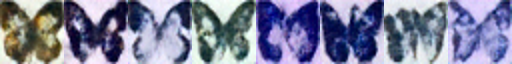

In [3]:
# Another example
from diffusers import DDPMPipeline
butterfly_pipeline = DDPMPipeline.from_pretrained("johnowhitaker/ddpm-butterflies-32px").to(device)
images = butterfly_pipeline(batch_size=8).images
make_grid(images)

In [5]:
import torchvision
from datasets import load_dataset
from torchvision import transforms

dataset = load_dataset("huggan/smithsonian_butterflies_subset", split="train")
# dataset = load_dataset("imagefolder", data_dir="path/to/folder")

image_size = 32
batch_size = 64
preprocess = transforms.Compose(
    [
        transforms.Resize((image_size, image_size)), 
        transforms.RandomHorizontalFlip(),  
        transforms.ToTensor(), 
        transforms.Normalize([0.5], [0.5]),  # Map to (-1, 1)
    ]
)

def transform(examples):
    images = [preprocess(image.convert("RGB")) for image in examples["image"]]
    return {"images": images}

dataset.set_transform(transform)
train_dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)

README.md:   0%|          | 0.00/609 [00:00<?, ?B/s]

Repo card metadata block was not found. Setting CardData to empty.


dataset_infos.json:   0%|          | 0.00/1.65k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/237M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/1000 [00:00<?, ? examples/s]

X shape: torch.Size([8, 3, 32, 32])


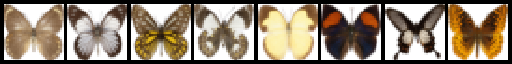

In [6]:
xb = next(iter(train_dataloader))["images"].to(device)[:8]
print("X shape:", xb.shape)
show_images(xb).resize((8 * 64, 64), resample=Image.NEAREST)

In [34]:
from diffusers import DDPMScheduler

$\mathbf{x}_t \mid \mathbf{x}_0$ = $\sqrt{\bar{\alpha}_t} \mathbf{x}_0+\sqrt{1-\bar{\alpha}_t} \pmb{\epsilon}$ for $\pmb{\epsilon} \sim \mathcal{N}(\mathbf{0}, \mathbf{I})$

/var/folders/2v/0s_wd0cd04g3xtcdpppg90980000gn/T/ipykernel_85924/3765775913.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(fontsize="x-large")


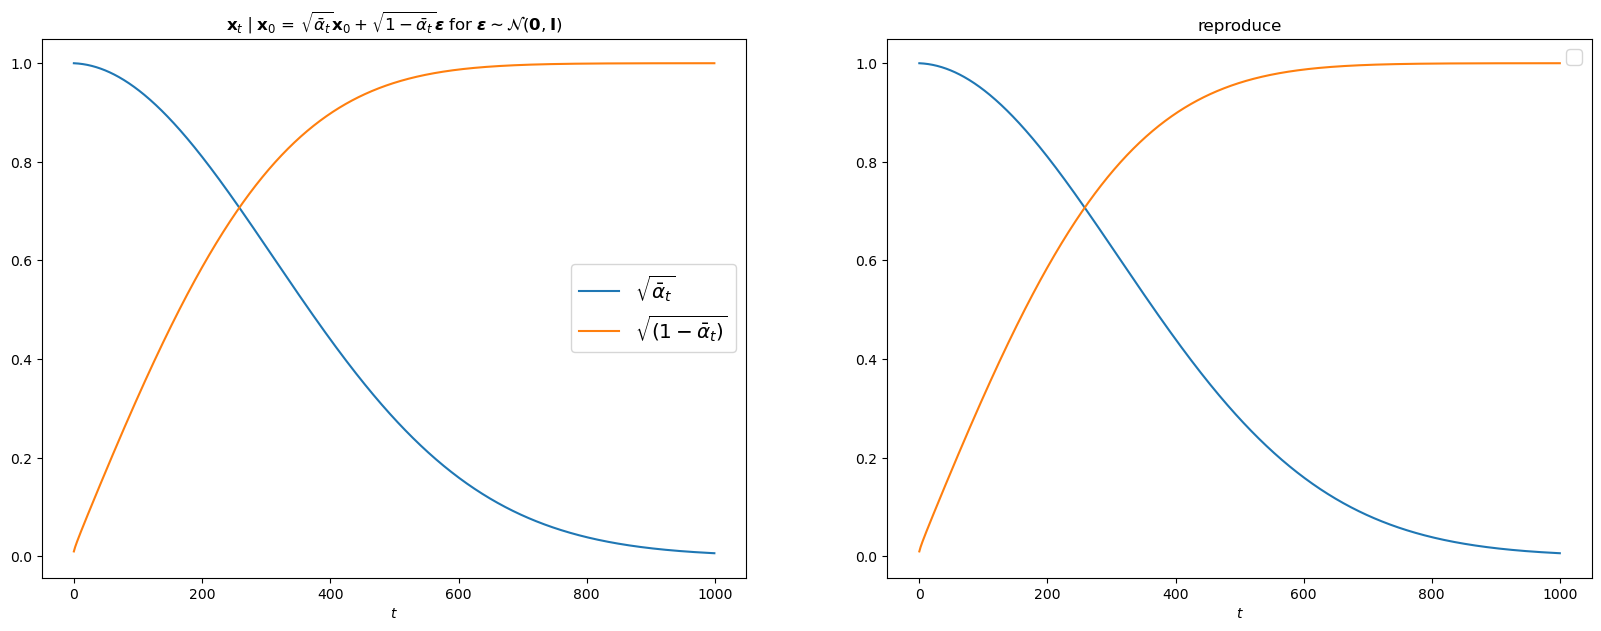

In [86]:
fig, axs = plt.subplots(ncols = 2, figsize = (20,7))
axs[0].plot(noise_scheduler.alphas_cumprod.cpu() ** 0.5, label=r"${\sqrt{\bar{\alpha}_t}}$")
axs[0].plot((1 - noise_scheduler.alphas_cumprod.cpu()) ** 0.5, label=r"$\sqrt{(1 - \bar{\alpha}_t)}$")
axs[0].set_title(r"$\mathbf{x}_t \mid \mathbf{x}_0$ = $\sqrt{\bar{\alpha}_t} \mathbf{x}_0+\sqrt{1-\bar{\alpha}_t} \boldsymbol{\epsilon}$ for $\boldsymbol{\epsilon} \sim \mathcal{N}(\mathbf{0}, \mathbf{I})$")
xs = np.linspace(0, 1000, 1001)
betas = np.linspace(10**-4, 0.02, 1001)
# betas = np.ones(xs.shape)*(10**-4) # we can experiment with different variance schedules here
bar_alphas = (1-betas).cumprod()
axs[1].plot(xs, bar_alphas**0.5)
axs[1].plot(xs, (1-bar_alphas)**0.5)
axs[1].set_title('reproduce')
for ax in axs:
    ax.set_xlabel(r"$t$")
    ax.legend(fontsize="x-large")

Noisy X shape torch.Size([8, 3, 32, 32])


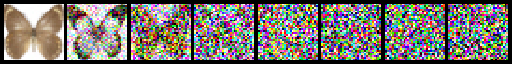

In [9]:
timesteps = torch.linspace(0, 999, 8).long().to(device)
noise = torch.randn_like(xb)
noisy_xb = noise_scheduler.add_noise(xb, noise, timesteps)
print("Noisy X shape", noisy_xb.shape)
show_images(noisy_xb).resize((8 * 64, 64), resample=Image.NEAREST)

In [90]:
from diffusers import UNet2DModel

# Create a model
model = UNet2DModel(
    sample_size=image_size,  # the target image resolution
    in_channels=3,  # the number of input channels, 3 for RGB images
    out_channels=3,  # the number of output channels
    layers_per_block=2,  # how many ResNet layers to use per UNet block
    block_out_channels=(64, 128, 128, 256),  # More channels -> more parameters
    down_block_types=(
        "DownBlock2D",  # a regular ResNet downsampling block
        "DownBlock2D",
        "AttnDownBlock2D",  # a ResNet downsampling block with spatial self-attention
        "AttnDownBlock2D",
    ),
    up_block_types=(
        "AttnUpBlock2D",
        "AttnUpBlock2D",  # a ResNet upsampling block with spatial self-attention
        "UpBlock2D",
        "UpBlock2D",  # a regular ResNet upsampling block
    ),
)
model.to(device);

In [17]:
with torch.no_grad():
    model_prediction = model(noisy_xb, timesteps).sample
model_prediction.shape

torch.Size([8, 3, 32, 32])

In [19]:
# Set the noise scheduler
noise_scheduler = DDPMScheduler(num_train_timesteps=1000, beta_schedule="squaredcos_cap_v2")

# Training loop
optimizer = torch.optim.AdamW(model.parameters(), lr=4e-4)

losses = []

for epoch in range(30):
    for step, batch in enumerate(train_dataloader):
        clean_images = batch["images"].to(device)
        # Sample noise to add to the images
        noise = torch.randn(clean_images.shape).to(clean_images.device)
        bs = clean_images.shape[0]

        # Sample a random timestep for each image
        timesteps = torch.randint(0, noise_scheduler.num_train_timesteps, (bs,), device=clean_images.device).long()

        # Add noise to the clean images according to the noise magnitude at each timestep
        noisy_images = noise_scheduler.add_noise(clean_images, noise, timesteps)

        # Get the model prediction
        noise_pred = model(noisy_images, timesteps, return_dict=False)[0]

        # Calculate the loss
        loss = F.mse_loss(noise_pred, noise)
        loss.backward(loss)
        losses.append(loss.item())

        # Update the model parameters with the optimizer
        optimizer.step()
        optimizer.zero_grad()

    if (epoch + 1) % 5 == 0:
        loss_last_epoch = sum(losses[-len(train_dataloader) :]) / len(train_dataloader)
        print(f"Epoch:{epoch+1}, loss: {loss_last_epoch}")

/opt/anaconda3/lib/python3.12/site-packages/diffusers/configuration_utils.py:140: FutureWarning: Accessing config attribute `num_train_timesteps` directly via 'DDPMScheduler' object attribute is deprecated. Please access 'num_train_timesteps' over 'DDPMScheduler's config object instead, e.g. 'scheduler.config.num_train_timesteps'.
  deprecate("direct config name access", "1.0.0", deprecation_message, standard_warn=False)


Epoch:5, loss: 0.14711024286225438
Epoch:10, loss: 0.1206896509975195
Epoch:15, loss: 0.100124625954777
Epoch:20, loss: 0.08775650151073933
Epoch:25, loss: 0.08525440446101129
Epoch:30, loss: 0.07862215861678123


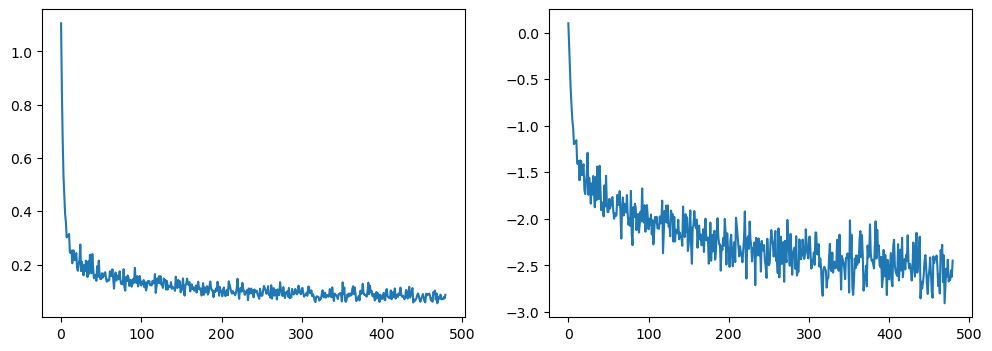

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[0].plot(losses)
axs[1].plot(np.log(losses))
plt.show()

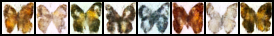

In [21]:
sample = torch.randn(8, 3, 32, 32).to(device)

for i, t in enumerate(noise_scheduler.timesteps):

    # Get model pred
    with torch.no_grad():
        residual = model(sample, t).sample

    # Update sample with step
    sample = noise_scheduler.step(residual, t, sample).prev_sample

show_images(sample)

### From Scratch

Here, we proceed by
- First implementing a simpler version of the diffusion model (where we change the implementation quite significantly from Hugging Face)
- Then moving on to the more accurate implementation

In [96]:
import torch
import torchvision
from torch import nn
from torch.nn import functional as F
from torch.utils.data import DataLoader
from diffusers import DDPMScheduler, UNet2DModel
from matplotlib import pyplot as plt

device = torch.device("mps" if torch.mps.is_available() else "cpu")
print(f"Using device: {device}")

Using device: mps


In [141]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize([0.5], [0.5])])

Input shape: torch.Size([8, 1, 28, 28])
Labels: tensor([5, 8, 6, 5, 5, 8, 4, 8])


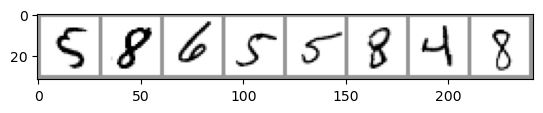

In [143]:
dataset = torchvision.datasets.MNIST(
    root="mnist/", train=True, download=True, transform=transform
)
train_dataloader = DataLoader(dataset, batch_size=8, shuffle=True)
x, y = next(iter(train_dataloader))
print("Input shape:", x.shape)
print("Labels:", y)
plt.imshow(torchvision.utils.make_grid(x)[0], cmap="Greys")

In [241]:
def corrupt(x, amount, return_noise = False):
    """Corrupt the input `x` by mixing it with noise according to `amount`"""
    noise = torch.randn_like(x)
    bar_alpha = (1 - amount).view(-1,1,1,1)
    noisy_x = x * (bar_alpha**0.5) + noise * ((1-bar_alpha)**0.5)
    if return_noise:
        return noisy_x, noise
    return noisy_x

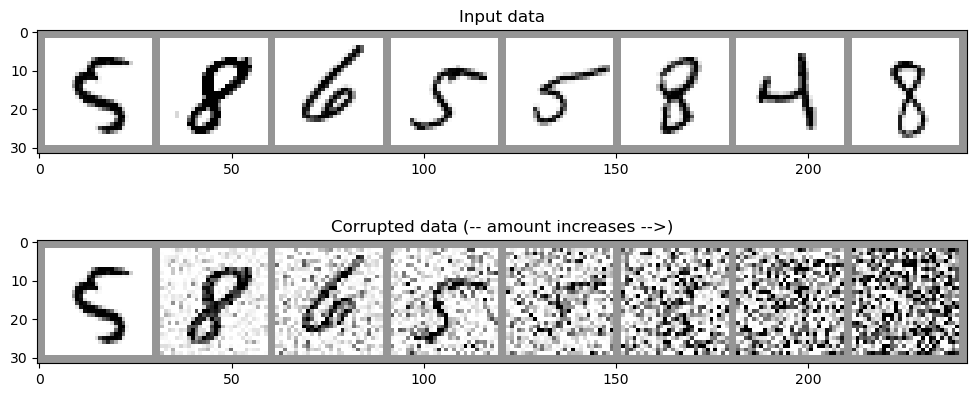

In [159]:
fig, axs = plt.subplots(2, 1, figsize=(12, 5))
axs[0].set_title("Input data")
axs[0].imshow(torchvision.utils.make_grid(x)[0], cmap="Greys")

# Adding noise
amount = torch.linspace(0, 1, x.shape[0])  # Left to right -> more corruption
noised_x = corrupt(x, amount)

# Plotting the noised version
axs[1].set_title("Corrupted data (-- amount increases -->)")
axs[1].imshow(torchvision.utils.make_grid(noised_x)[0], cmap="Greys", vmin = -1, vmax = 1)

In [161]:
class BasicUNet(nn.Module):
    """A minimal UNet implementation."""

    def __init__(self, in_channels=1, out_channels=1):
        super().__init__()
        self.down_layers = torch.nn.ModuleList(
            [
                nn.Conv2d(in_channels, 32, kernel_size=5, padding=2),
                nn.Conv2d(32, 64, kernel_size=5, padding=2),
                nn.Conv2d(64, 64, kernel_size=5, padding=2),
            ]
        )
        self.up_layers = torch.nn.ModuleList(
            [
                nn.Conv2d(64, 64, kernel_size=5, padding=2),
                nn.Conv2d(64, 32, kernel_size=5, padding=2),
                nn.Conv2d(32, out_channels, kernel_size=5, padding=2),
            ]
        )
        self.act = nn.SiLU()  # The activation function
        self.downscale = nn.MaxPool2d(2)
        self.upscale = nn.Upsample(scale_factor=2)

    def forward(self, x):
        h = []
        for i, l in enumerate(self.down_layers):
            x = self.act(l(x))  # Through the layer and the activation function
            if i < 2:  # For all but the third (final) down layer:
                h.append(x)  # Storing output for skip connection
                x = self.downscale(x)  # Downscale ready for the next layer

        for i, l in enumerate(self.up_layers):
            if i > 0:  # For all except the first up layer
                x = self.upscale(x)  # Upscale
                x += h.pop()  # Fetching stored output (skip connection)
            x = self.act(l(x))  # Through the layer and the activation function

        return x

In [195]:
betas = torch.linspace(10**-4, 0.02, 1001)
bar_alphas = torch.cumprod(1-betas, 0)

In [243]:
batch_size = 128
train_dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
n_epochs = 3
net = BasicUNet()
net.to(device)
loss_fn = nn.MSELoss()
opt = torch.optim.Adam(net.parameters(), lr=1e-3)

losses = []
for epoch in range(n_epochs):
    for x, y in train_dataloader:
        x = x.to(device) 
        ts = torch.randint(0, 1001, (x.shape[0],))
        noise_amount = (1 - bar_alphas[ts]).to(device) # This is a little convoluted because of the way Hugging Face defined "amount"
        # noise_amount = torch.randn(x.shape[0]).to(device)  
        noisy_x = corrupt(x, noise_amount) 
        pred = net(noisy_x)
        loss = loss_fn(pred, x) 
        opt.zero_grad()
        loss.backward()
        opt.step()
        losses.append(loss.item())

    avg_loss = sum(losses[-len(train_dataloader) :]) / len(train_dataloader)
    print(f"Finished epoch {epoch}. Average loss for this epoch: {avg_loss:05f}")

Finished epoch 0. Average loss for this epoch: 0.267031



KeyboardInterrupt



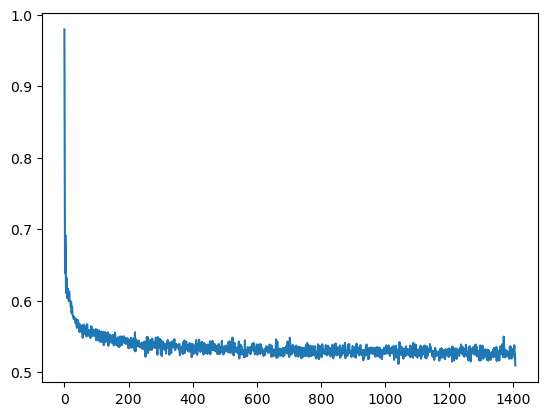

In [205]:
plt.plot(losses)

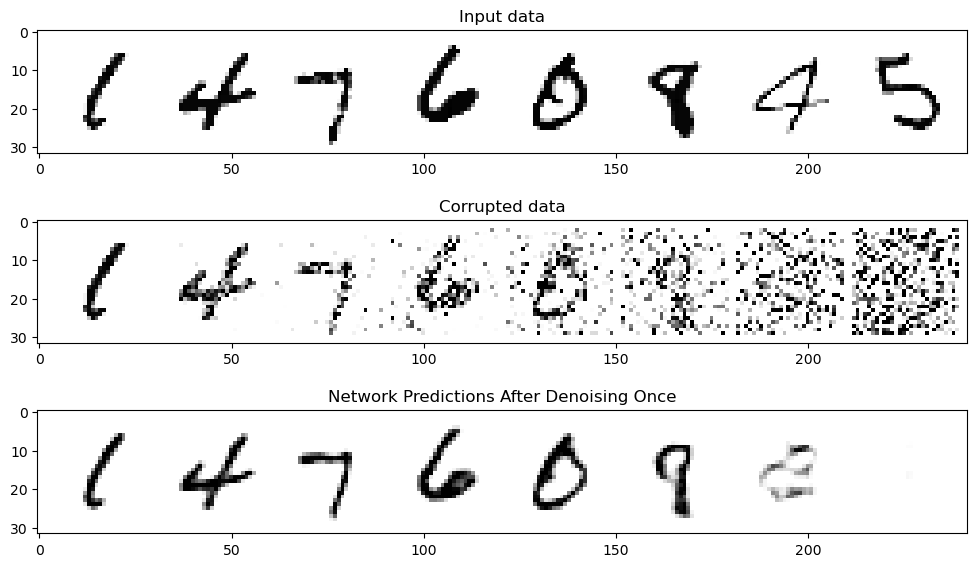

In [207]:
x, y = next(iter(train_dataloader))
x = x[:8]  # Only using the first 8 for easy plotting

# Corrupt with a range of amounts
amount = torch.linspace(0, 1, x.shape[0])  # Left to right -> more corruption
noised_x = corrupt(x, amount)

# Get the model predictions
with torch.no_grad():
    preds = net(noised_x.to(device)).detach().cpu()

# Plot
fig, axs = plt.subplots(3, 1, figsize=(12, 7))
axs[0].set_title("Input data")
axs[0].imshow(torchvision.utils.make_grid(x)[0].clip(0, 1), cmap="Greys")
axs[1].set_title("Corrupted data")
axs[1].imshow(torchvision.utils.make_grid(noised_x)[0].clip(0, 1), cmap="Greys")
axs[2].set_title("Network Predictions After Denoising Once")
axs[2].imshow(torchvision.utils.make_grid(preds)[0].clip(0, 1), cmap="Greys")

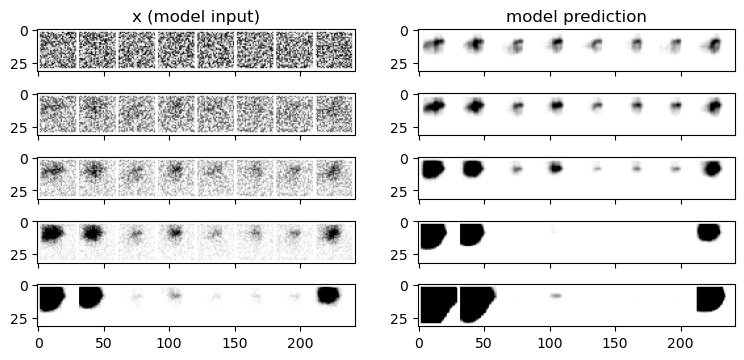

In [209]:
# Our results don't look as good as hugging face's, but this isn't the real diffusion implementation anyway

n_steps = 5
x = torch.rand(8, 1, 28, 28).to(device)  # Start from random
step_history = [x.detach().cpu()]
pred_output_history = []

for i in range(n_steps):
    with torch.no_grad():  # No need to track gradients during inference
        pred = net(x)  # Predict the denoised x0
    pred_output_history.append(pred.detach().cpu())  # Store model output for plotting
    mix_factor = 1 / (n_steps - i)  # How much we move towards the prediction
    x = x * (1 - mix_factor) + pred * mix_factor  # Move part of the way there
    step_history.append(x.detach().cpu())  # Store step for plotting

fig, axs = plt.subplots(n_steps, 2, figsize=(9, 4), sharex=True)
axs[0, 0].set_title("x (model input)")
axs[0, 1].set_title("model prediction")
for i in range(n_steps):
    axs[i, 0].imshow(torchvision.utils.make_grid(step_history[i])[0].clip(0, 1), cmap="Greys")
    axs[i, 1].imshow(torchvision.utils.make_grid(pred_output_history[i])[0].clip(0, 1), cmap="Greys")

In [213]:
# More steps

# n_steps = 40
# x = torch.rand(64, 1, 28, 28).to(device)
# for i in range(n_steps):
#     noise_amount = torch.ones((x.shape[0],)).to(device) * (1 - (i / n_steps))  # Starting high going low
#     with torch.no_grad():
#         pred = net(x)
#     mix_factor = 1 / (n_steps - i)
#     x = x * (1 - mix_factor) + pred * mix_factor
# fig, ax = plt.subplots(1, 1, figsize=(12, 12))
# ax.imshow(torchvision.utils.make_grid(x.detach().cpu(), nrow=8)[0].clip(0, 1), cmap="Greys")

#### Correct Implementation
- We use a larger model
- We predict the noise rather than the original sample
- We pass in the time step as an input argument
- We reconstruct by going through the full process

In [ ]:
batch_size = 128
train_dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
n_epochs = 3

# More sophisticated network
net = UNet2DModel(
    sample_size=28,  # the target image resolution
    in_channels=1,  # the number of input channels, 3 for RGB images
    out_channels=1,  # the number of output channels
    layers_per_block=2,  # how many ResNet layers to use per UNet block
    block_out_channels=(32, 64, 64),  # Roughly matching our basic unet example
    down_block_types=(
        "DownBlock2D",  # a regular ResNet downsampling block
        "AttnDownBlock2D",  # a ResNet downsampling block with spatial self-attention
        "AttnDownBlock2D",
    ),
    up_block_types=(
        "AttnUpBlock2D",
        "AttnUpBlock2D",  # a ResNet upsampling block with spatial self-attention
        "UpBlock2D",  # a regular ResNet upsampling block
    ),
) 
net.to(device)

loss_fn = nn.MSELoss()
opt = torch.optim.Adam(net.parameters(), lr=1e-3)
losses = []

for epoch in range(n_epochs):
    for x, y in train_dataloader:
        x = x.to(device)  
        ts = torch.randint(0, 1001, (x.shape[0],)).to(device)
        noise_amount = (1 - bar_alphas.to(device)[ts])
        # noise_amount = torch.rand(x.shape[0]).to(device)  
        noisy_x, noise = corrupt(x, noise_amount, return_noise = True) 
        pred = net(noisy_x, ts)[0]
        loss = loss_fn(pred, noise)
        opt.zero_grad()
        loss.backward()
        opt.step()
        losses.append(loss.item())
    avg_loss = sum(losses[-len(train_dataloader) :]) / len(train_dataloader)
    print(f"Finished epoch {epoch}. Average loss for this epoch: {avg_loss:05f}")

$\mathbf{x}_{t-1}=\frac{1}{\sqrt{\alpha_t}}\left(\mathbf{x}_t-\frac{1-\alpha_t}{\sqrt{1-\bar{\alpha}_t}} \pmb{\epsilon}_\theta\left(\mathbf{x}_t, t\right)\right)+\sigma_t \mathbf{z}$

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].plot(losses)
axs[0].set_ylim(0, 0.1)
axs[0].set_title("Loss over time")

n_steps = 40
x = torch.rand(64, 1, 28, 28).to(device)
for i in range(n_steps):
    noise_amount = (1 - bar_alphas.to(device)[1000-i])  # Starting high going low
    with torch.no_grad():
        pred = net(x, 0).sample
    # ToDo: Implement

# axs[1].imshow(torchvision.utils.make_grid(x.detach().cpu(), nrow=8)[0].clip(0, 1), cmap="Greys")
# axs[1].set_title("Generated Samples")

## Fine-Tuning, Guidance and Conditioning

### Fine-Tuning

In [6]:
import numpy as np
import torch
import torch.nn.functional as F
import torchvision
from datasets import load_dataset
from diffusers import DDIMScheduler, DDPMPipeline
from matplotlib import pyplot as plt
from PIL import Image
from torchvision import transforms
from tqdm.auto import tqdm

In [8]:
device = "mps" if torch.backends.mps.is_available() else "cuda" if torch.cuda.is_available() else "cpu"

In [12]:
image_pipe = DDPMPipeline.from_pretrained("google/ddpm-celebahq-256")
image_pipe.to(device)
# This is slow because we need to denoise at every step
# images = image_pipe().images
# images[0]

0it [00:00, ?it/s]

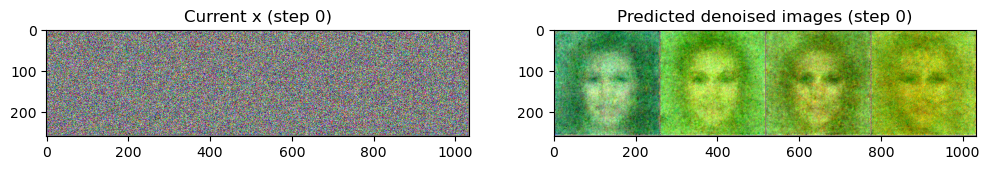

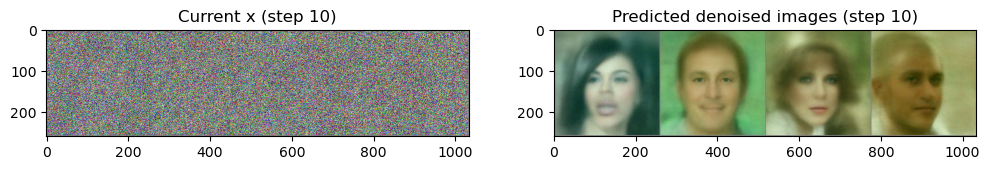

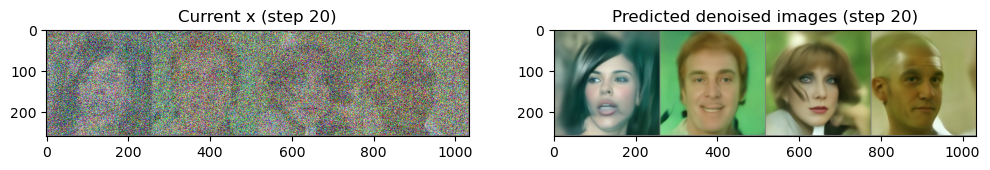

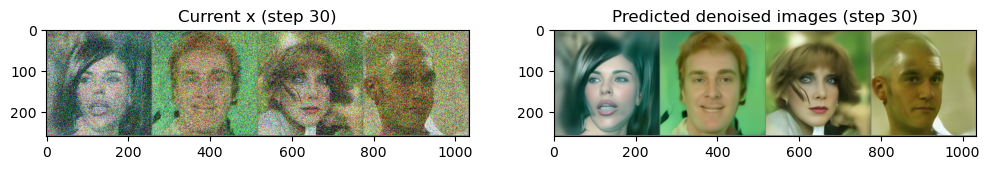

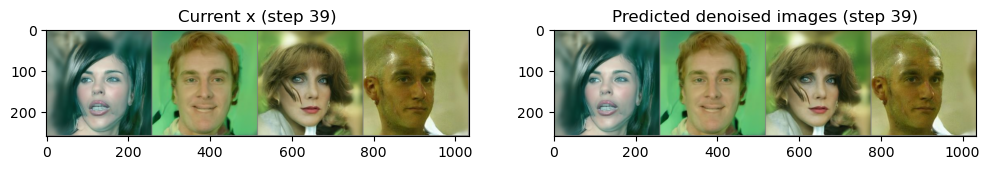

In [16]:
# What if instead of 1000 steps we only do 40 steps?
scheduler = DDIMScheduler.from_pretrained("google/ddpm-celebahq-256")
scheduler.set_timesteps(num_inference_steps=40)
x = torch.randn(4, 3, 256, 256).to(device)  

# Loop through the sampling timesteps
for i, t in tqdm(enumerate(scheduler.timesteps)):
    model_input = scheduler.scale_model_input(x, t)
    with torch.no_grad():
        noise_pred = image_pipe.unet(model_input, t)["sample"]
    scheduler_output = scheduler.step(noise_pred, t, x)
    x = scheduler_output.prev_sample
    if i % 10 == 0 or i == len(scheduler.timesteps) - 1:
        fig, axs = plt.subplots(1, 2, figsize=(12, 5))

        grid = torchvision.utils.make_grid(x, nrow=4).permute(1, 2, 0)
        axs[0].imshow(grid.cpu().clip(-1, 1) * 0.5 + 0.5)
        axs[0].set_title(f"Current x (step {i})")

        pred_x0 = scheduler_output.pred_original_sample  # Not available for all schedulers
        grid = torchvision.utils.make_grid(pred_x0, nrow=4).permute(1, 2, 0)
        axs[1].imshow(grid.cpu().clip(-1, 1) * 0.5 + 0.5)
        axs[1].set_title(f"Predicted denoised images (step {i})")
        plt.show()

  0%|          | 0/40 [00:00<?, ?it/s]

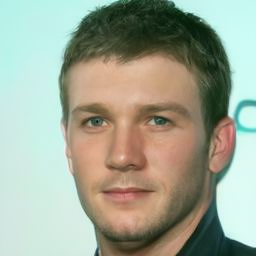

In [18]:
image_pipe.scheduler = scheduler
images = image_pipe(num_inference_steps=40).images
images[0]

Repo card metadata block was not found. Setting CardData to empty.


Previewing batch:


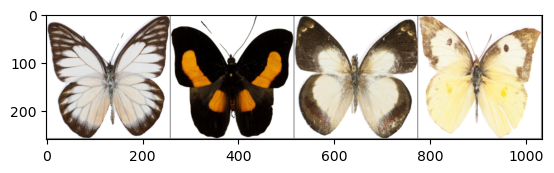

In [21]:
# Load data to finetune with
dataset_name = "huggan/smithsonian_butterflies_subset"  # @param
dataset = load_dataset(dataset_name, split="train")
image_size = 256  
batch_size = 4  
preprocess = transforms.Compose(
    [
        transforms.Resize((image_size, image_size)),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.5], [0.5]),
    ]
)
def transform(examples):
    images = [preprocess(image.convert("RGB")) for image in examples["image"]]
    return {"images": images}
dataset.set_transform(transform)
train_dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)
print("Previewing batch:")
batch = next(iter(train_dataloader))
grid = torchvision.utils.make_grid(batch["images"], nrow=4)
plt.imshow(grid.permute(1, 2, 0).cpu().clip(-1, 1) * 0.5 + 0.5)

In [25]:
# Finetune base model with butterfly dataset
num_epochs = 2  
lr = 1e-5  
grad_accumulation_steps = 2  # Because batch size is very small

optimizer = torch.optim.AdamW(image_pipe.unet.parameters(), lr=lr)

losses = []

for epoch in range(num_epochs):
    for step, batch in tqdm(enumerate(train_dataloader), total=len(train_dataloader)):
        clean_images = batch["images"].to(device)
        noise = torch.randn(clean_images.shape).to(clean_images.device)
        bs = clean_images.shape[0]
        timesteps = torch.randint(
            0,
            image_pipe.scheduler.num_train_timesteps,
            (bs,),
            device=clean_images.device,
        ).long()
        noisy_images = image_pipe.scheduler.add_noise(clean_images, noise, timesteps)
        noise_pred = image_pipe.unet(noisy_images, timesteps, return_dict=False)[0]
        loss = F.mse_loss(
            noise_pred, noise
        )  
        losses.append(loss.item())
        loss.backward(loss)

        # Gradient accumulation:
        if (step + 1) % grad_accumulation_steps == 0:
            optimizer.step()
            optimizer.zero_grad()
    print(f"Epoch {epoch} average loss: {sum(losses[-len(train_dataloader):])/len(train_dataloader)}")
plt.plot(losses)

In [27]:
# images look strange after a few epochs of finetuning

x = torch.randn(8, 3, 256, 256).to(device)  # Batch of 8
for i, t in tqdm(enumerate(scheduler.timesteps)):
    model_input = scheduler.scale_model_input(x, t)
    with torch.no_grad():
        noise_pred = image_pipe.unet(model_input, t)["sample"]
    x = scheduler.step(noise_pred, t, x).prev_sample
grid = torchvision.utils.make_grid(x, nrow=4)
plt.imshow(grid.permute(1, 2, 0).cpu().clip(-1, 1) * 0.5 + 0.5)

### Guidance

In [36]:
def color_loss(images, target_color=(0.1, 0.9, 0.5)):
    """Given a target color (R, G, B) return a loss for how far away on average
    the images' pixels are from that color. Defaults to a light teal: (0.1, 0.9, 0.5)"""
    target = torch.tensor(target_color).to(images.device) * 2 - 1  # Map target color to (-1, 1)
    target = target[None, :, None, None]  # Get shape right to work with the images (b, c, h, w)
    error = torch.abs(images - target).mean()  # Mean absolute difference between the image pixels and the target color
    return error

In [32]:
# Variant 1: shortcut method
# Assume predicted noise is fixed when calculating gradients, i.e. backpropagate for half of process
# Note that at each timestep, we only nudge x once. But we do this throughout the entire "trajectory"

# The guidance scale determines the strength of the effect
guidance_loss_scale = 40  
x = torch.randn(8, 3, 256, 256).to(device)

for i, t in tqdm(enumerate(scheduler.timesteps)):
    model_input = scheduler.scale_model_input(x, t)
    with torch.no_grad():
        noise_pred = image_pipe.unet(model_input, t)["sample"]
    x = x.detach().requires_grad_()
    x0 = scheduler.step(noise_pred, t, x).pred_original_sample
    loss = color_loss(x0) * guidance_loss_scale
    if i % 10 == 0:
        print(i, "loss:", loss.item())
    cond_grad = -torch.autograd.grad(loss, x)[0]
    x = x.detach() + cond_grad
    x = scheduler.step(noise_pred, t, x).prev_sample

grid = torchvision.utils.make_grid(x, nrow=4)
im = grid.permute(1, 2, 0).cpu().clip(-1, 1) * 0.5 + 0.5
Image.fromarray(np.array(im * 255).astype(np.uint8))

In [34]:
# Variant 2: more expensive method
# Calculate gradients for the predicted noise too
# I wonder why we don't recompute noise_pred, but may be computational

x = torch.randn(4, 3, 256, 256).to(device)

for i, t in tqdm(enumerate(scheduler.timesteps)):
    x = x.detach().requires_grad_()
    model_input = scheduler.scale_model_input(x, t)
    noise_pred = image_pipe.unet(model_input, t)["sample"]
    x0 = scheduler.step(noise_pred, t, x).pred_original_sample
    loss = color_loss(x0) * guidance_loss_scale
    if i % 10 == 0:
        print(i, "loss:", loss.item())
    cond_grad = -torch.autograd.grad(loss, x)[0]
    x = x.detach() + cond_grad
    x = scheduler.step(noise_pred, t, x).prev_sample

grid = torchvision.utils.make_grid(x, nrow=4)
im = grid.permute(1, 2, 0).cpu().clip(-1, 1) * 0.5 + 0.5
Image.fromarray(np.array(im * 255).astype(np.uint8))

In [38]:
import open_clip

clip_model, _, preprocess = open_clip.create_model_and_transforms("ViT-B-32", pretrained="openai")
clip_model.to(device)

# Transforms to resize and augment an image + normalize to match CLIP's training data
tfms = torchvision.transforms.Compose(
    [
        torchvision.transforms.RandomResizedCrop(224),  
        torchvision.transforms.RandomAffine(5),  
        torchvision.transforms.RandomHorizontalFlip(),  
        torchvision.transforms.Normalize(
            mean=(0.48145466, 0.4578275, 0.40821073),
            std=(0.26862954, 0.26130258, 0.27577711),
        ),
    ]
)

# Define a loss function that takes an image, embeds it and compares with
# the text features of the prompt
def clip_loss(image, text_features):
    image_features = clip_model.encode_image(tfms(image))
    input_normed = torch.nn.functional.normalize(image_features.unsqueeze(1), dim=2)
    embed_normed = torch.nn.functional.normalize(text_features.unsqueeze(0), dim=2)
    dists = input_normed.sub(embed_normed).norm(dim=2).div(2).arcsin().pow(2).mul(2)  # Squared Great Circle Distance
    return dists.mean()

In [40]:
prompt = "Red Rose (still life), red flower painting"  
guidance_scale = 8  
n_cuts = 4  

# More steps -> more time for the guidance to have an effect
scheduler.set_timesteps(50)
text = open_clip.tokenize([prompt]).to(device)
with torch.no_grad(), torch.cuda.amp.autocast():
    text_features = clip_model.encode_text(text)

x = torch.randn(4, 3, 256, 256).to(device) 
for i, t in tqdm(enumerate(scheduler.timesteps)):
    model_input = scheduler.scale_model_input(x, t)
    with torch.no_grad():
        noise_pred = image_pipe.unet(model_input, t)["sample"]
    cond_grad = 0
    # Make multiple predictions of original denoised sample
    for cut in range(n_cuts):
        x = x.detach().requires_grad_()
        x0 = scheduler.step(noise_pred, t, x).pred_original_sample
        loss = clip_loss(x0, text_features) * guidance_scale
        cond_grad -= torch.autograd.grad(loss, x)[0] / n_cuts
    if i % 25 == 0:
        print("Step:", i, ", Guidance loss:", loss.item())

    # This scaling determines when we want the conditioning to "kick" in
    alpha_bar = scheduler.alphas_cumprod[i]
    x = x.detach() + cond_grad * alpha_bar.sqrt() 
    x = scheduler.step(noise_pred, t, x).prev_sample

grid = torchvision.utils.make_grid(x.detach(), nrow=4)
im = grid.permute(1, 2, 0).cpu().clip(-1, 1) * 0.5 + 0.5
Image.fromarray(np.array(im * 255).astype(np.uint8))

### Conditioning

We condition by concatenating 4 additional channels. Each channel will have the same value across all 28x28 pixels.

In [2]:
import torch
import torchvision
from torch import nn
from torch.nn import functional as F
from torch.utils.data import DataLoader
from diffusers import DDPMScheduler, UNet2DModel
from matplotlib import pyplot as plt
from tqdm.auto import tqdm

device = "mps" if torch.backends.mps.is_available() else "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: mps


Input shape: torch.Size([8, 1, 28, 28])
Labels: tensor([9, 7, 5, 4, 8, 2, 1, 8])


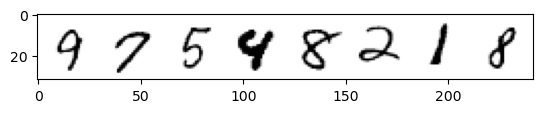

In [6]:
dataset = torchvision.datasets.MNIST(
    root="mnist/", train=True, download=True, transform=torchvision.transforms.ToTensor()
)

train_dataloader = DataLoader(dataset, batch_size=8, shuffle=True)
x, y = next(iter(train_dataloader))
print("Input shape:", x.shape)
print("Labels:", y)
plt.imshow(torchvision.utils.make_grid(x)[0], cmap="Greys")

In [22]:
class ClassConditionedUnet(nn.Module):
    def __init__(self, num_classes=10, class_emb_size=4):
        super().__init__()
        self.class_emb = nn.Embedding(num_classes, class_emb_size)
        self.model = UNet2DModel(
            sample_size=28,  # the target image resolution
            in_channels=1 + class_emb_size,  # Additional input channels for class cond.
            out_channels=1,  
            layers_per_block=2,  # how many ResNet layers to use per UNet block
            block_out_channels=(32, 64, 64),
            down_block_types=(
                "DownBlock2D",  
                "AttnDownBlock2D", 
                "AttnDownBlock2D",
            ),
            up_block_types=(
                "AttnUpBlock2D",
                "AttnUpBlock2D",  
                "UpBlock2D", 
            ),
        )

    def forward(self, x, t, class_labels):
        bs, ch, w, h = x.shape

        class_cond = self.class_emb(class_labels)  
        class_cond = class_cond.view(bs, class_cond.shape[1], 1, 1).expand(bs, class_cond.shape[1], w, h)
        net_input = torch.cat((x, class_cond), 1)  # (bs, 5, 28, 28)
        return self.model(net_input, t).sample 

In [24]:
noise_scheduler = DDPMScheduler(num_train_timesteps=1000, beta_schedule="squaredcos_cap_v2")

In [28]:
train_dataloader = DataLoader(dataset, batch_size=128, shuffle=True)
n_epochs = 10
net = ClassConditionedUnet().to(device)
loss_fn = nn.MSELoss()
opt = torch.optim.Adam(net.parameters(), lr=1e-3)
losses = []

for epoch in range(n_epochs):
    for x, y in tqdm(train_dataloader):

        x = x.to(device) * 2 - 1  # Data on the GPU (mapped to (-1, 1))
        y = y.to(device)
        noise = torch.randn_like(x)
        timesteps = torch.randint(0, 999, (x.shape[0],)).long().to(device)
        noisy_x = noise_scheduler.add_noise(x, noise, timesteps)

        pred = net(noisy_x, timesteps, y)  # Note that we pass in the labels y
        loss = loss_fn(pred, noise)  
        opt.zero_grad()
        loss.backward()
        opt.step()
        losses.append(loss.item())

    avg_loss = sum(losses[-100:]) / 100
    print(f"Finished epoch {epoch}. Average of the last 100 loss values: {avg_loss:05f}")

plt.plot(losses)

In [30]:
x = torch.randn(80, 1, 28, 28).to(device)
y = torch.tensor([[i] * 8 for i in range(10)]).flatten().to(device)

for i, t in tqdm(enumerate(noise_scheduler.timesteps)):
    with torch.no_grad():
        residual = net(x, t, y)  # Again, note that we pass in our labels y
    x = noise_scheduler.step(residual, t, x).prev_sample

# Show the results
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
ax.imshow(torchvision.utils.make_grid(x.detach().cpu().clip(-1, 1), nrow=8)[0], cmap="Greys")

## Stable Diffusion

In the following subsections we describe and code up components of stable diffusion. A more fleshed out re-implementation can be found at [Umar Jamil's](https://www.youtube.com/watch?v=ZBKpAp_6TGI) video. 

In [39]:
import torch
import requests
from PIL import Image
from io import BytesIO
from matplotlib import pyplot as plt

# We'll be exploring a number of pipelines today!
from diffusers import (
    StableDiffusionPipeline,
    StableDiffusionImg2ImgPipeline,
    StableDiffusionInpaintPipeline,
    StableDiffusionDepth2ImgPipeline,
)

# We'll use a couple of demo images later in the notebook
def download_image(url):
    response = requests.get(url)
    return Image.open(BytesIO(response.content)).convert("RGB")


# Download images for inpainting example
img_url = "https://raw.githubusercontent.com/CompVis/latent-diffusion/main/data/inpainting_examples/overture-creations-5sI6fQgYIuo.png"
mask_url = "https://raw.githubusercontent.com/CompVis/latent-diffusion/main/data/inpainting_examples/overture-creations-5sI6fQgYIuo_mask.png"

init_image = download_image(img_url).resize((512, 512))
mask_image = download_image(mask_url).resize((512, 512))

In [41]:
device = "mps" if torch.backends.mps.is_available() else "cuda" if torch.cuda.is_available() else "cpu"

In [43]:
model_id = "stabilityai/stable-diffusion-2-1-base"
pipe = StableDiffusionPipeline.from_pretrained(model_id).to(device)

model_index.json:   0%|          | 0.00/543 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/613 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/807 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/346 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/911 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/553 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.46G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

In [44]:
# We can generate images
generator = torch.Generator(device=device).manual_seed(42)

# Run the pipeline, showing some of the available arguments
pipe_output = pipe(
    prompt="Palette knife painting of an autumn cityscape",  # What to generate
    negative_prompt="Oversaturated, blurry, low quality",  # What NOT to generate
    height=480,
    width=640,  
    guidance_scale=8,  # How strongly to follow the prompt
    num_inference_steps=35,  # How many steps to take
    generator=generator,  # Fixed random seed
)

# View the resulting image
pipe_output.images[0]

In [45]:
# Effect of increasing guidance
cfg_scales = [1.1, 8, 12]  # @param
prompt = "A collie with a pink hat"  # @param
fig, axs = plt.subplots(1, len(cfg_scales), figsize=(16, 5))
for i, ax in enumerate(axs):
    im = pipe(
        prompt,
        height=480,
        width=480,
        guidance_scale=cfg_scales[i],
        num_inference_steps=35,
        generator=torch.Generator(device=device).manual_seed(42),
    ).images[0]
    ax.imshow(im)
    ax.set_title(f"CFG Scale {cfg_scales[i]}")

In [46]:
print(list(pipe.components.keys()))

['vae', 'text_encoder', 'tokenizer', 'unet', 'scheduler', 'safety_checker', 'feature_extractor', 'image_encoder']


In [47]:
# VAE
images = torch.rand(1, 3, 512, 512).to(device) * 2 - 1
print("Input images shape:", images.shape)

# Encode to latent space
with torch.no_grad():
    latents = 0.18215 * pipe.vae.encode(images).latent_dist.mean
print("Encoded latents shape:", latents.shape)

# Decode again
with torch.no_grad():
    decoded_images = pipe.vae.decode(latents / 0.18215).sample
print("Decoded images shape:", decoded_images.shape)

Input images shape: torch.Size([1, 3, 512, 512])
Encoded latents shape: torch.Size([1, 4, 64, 64])
Decoded images shape: torch.Size([1, 3, 512, 512])


In [53]:
## tokenizer + text_encoder

# Tokenize
input_ids = pipe.tokenizer(["A painting of a flooble"])["input_ids"]
print("Input ID -> decoded token")
for input_id in input_ids[0]:
    print(f"{input_id} -> {pipe.tokenizer.decode(input_id)}")

# Feed through CLIP text encoder
input_ids = torch.tensor(input_ids).to(device)
with torch.no_grad():
    text_embeddings = pipe.text_encoder(input_ids)["last_hidden_state"]
print("Text embeddings shape:", text_embeddings.shape)

Input ID -> decoded token
49406 -> <|startoftext|>
320 -> a
3086 -> painting
539 -> of
320 -> a
4062 -> floo
1059 -> ble
49407 -> <|endoftext|>
Text embeddings shape: torch.Size([1, 8, 1024])


In [61]:
text_embeddings = pipe.encode_prompt("A painting of a flooble", device, 1, False, "")
text_embeddings[0].shape

torch.Size([1, 77, 1024])

In [67]:
# unet takes in args and gives noise prediction
timestep = pipe.scheduler.timesteps[0]
latents = torch.randn(1, 4, 64, 64).to(device)
text_embeddings = torch.randn(1, 77, 1024).to(device)

with torch.no_grad():
    unet_output = pipe.unet(latents, timestep, text_embeddings).sample
print("UNet output shape:", unet_output.shape)  

UNet output shape: torch.Size([1, 4, 64, 64])


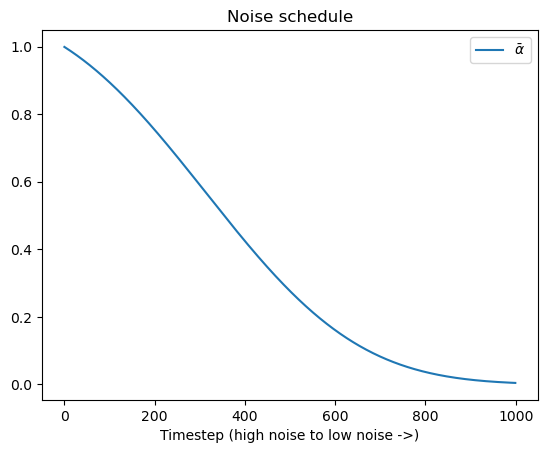

In [69]:
plt.plot(pipe.scheduler.alphas_cumprod, label=r"$\bar{\alpha}$")
plt.xlabel("Timestep (high noise to low noise ->)")
plt.title("Noise schedule")
plt.legend()

In [75]:
# Sample
guidance_scale = 8  
num_inference_steps = 30 
prompt = "Beautiful picture of a wave breaking" 
negative_prompt = "zoomed in, blurry, oversaturated, warped"  

text_embeddings = pipe._encode_prompt(prompt, device, 1, True, negative_prompt)
latents = torch.randn((1, 4, 64, 64), device=device, generator=torch.Generator(device=device).manual_seed(42))
latents *= pipe.scheduler.init_noise_sigma

pipe.scheduler.set_timesteps(num_inference_steps, device=device)

for i, t in enumerate(pipe.scheduler.timesteps):
    # Classifier free guidance
    latent_model_input = torch.cat([latents] * 2)
    latent_model_input = pipe.scheduler.scale_model_input(latent_model_input, t)
    with torch.no_grad():
        noise_pred = pipe.unet(latent_model_input, t, encoder_hidden_states=text_embeddings).sample

    # Perform guidance
    noise_pred_uncond, noise_pred_text = noise_pred.chunk(2)
    noise_pred = noise_pred_uncond + guidance_scale * (noise_pred_text - noise_pred_uncond)

    latents = pipe.scheduler.step(noise_pred, t, latents).prev_sample

with torch.no_grad():
    image = pipe.decode_latents(latents.detach())

pipe.numpy_to_pil(image)[0]

## Audio

In [5]:
import torch, random
import numpy as np
import torch.nn.functional as F
from tqdm.auto import tqdm
from IPython.display import Audio
from matplotlib import pyplot as plt
from diffusers import DiffusionPipeline
from torchaudio import transforms as AT
from torchvision import transforms as IT

In [6]:
device = "mps" if torch.backends.mps.is_available() else "cuda" if torch.cuda.is_available() else "cpu"
pipe = DiffusionPipeline.from_pretrained("teticio/audio-diffusion-instrumental-hiphop-256").to(device)

Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

unet/config.json:   0%|          | 0.00/791 [00:00<?, ?B/s]

mel/mel_config.json:   0%|          | 0.00/191 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/261 [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/455M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/3 [00:00<?, ?it/s]

An error occurred while trying to fetch /Users/erict/.cache/huggingface/hub/models--teticio--audio-diffusion-instrumental-hiphop-256/snapshots/a63b0c7e794925f74f021d356c13bce47cb69264/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /Users/erict/.cache/huggingface/hub/models--teticio--audio-diffusion-instrumental-hiphop-256/snapshots/a63b0c7e794925f74f021d356c13bce47cb69264/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.


In [22]:
sample_rate_pipeline = pipe.mel.get_sample_rate()
sample_rate_pipeline

22050

  0%|          | 0/1000 [00:00<?, ?it/s]

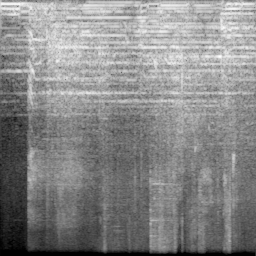

In [8]:
output = pipe()
display(output.images[0])
display(Audio(output.audios[0], rate=pipe.mel.get_sample_rate()))

In [10]:
from datasets import load_dataset

dataset = load_dataset("lewtun/music_genres", split="train")
dataset

README.md:   0%|          | 0.00/545 [00:00<?, ?B/s]

(…)-00000-of-00016-6b5481c76a3d2702.parquet:   0%|          | 0.00/489M [00:00<?, ?B/s]

(…)-00001-of-00016-438bb9cb7b06002c.parquet:   0%|          | 0.00/488M [00:00<?, ?B/s]

(…)-00002-of-00016-c1a616564aeae4b0.parquet:   0%|          | 0.00/490M [00:00<?, ?B/s]

(…)-00003-of-00016-73a29e154975c452.parquet:   0%|          | 0.00/488M [00:00<?, ?B/s]

(…)-00004-of-00016-db37b9fc5526f40b.parquet:   0%|          | 0.00/489M [00:00<?, ?B/s]

(…)-00005-of-00016-93716f278704089e.parquet:   0%|          | 0.00/488M [00:00<?, ?B/s]

(…)-00006-of-00016-5d90eeed316ceb16.parquet:   0%|          | 0.00/487M [00:00<?, ?B/s]

(…)-00007-of-00016-92ae3797361c8db8.parquet:   0%|          | 0.00/492M [00:00<?, ?B/s]

(…)-00008-of-00016-26222f0024734427.parquet:   0%|          | 0.00/484M [00:00<?, ?B/s]

(…)-00009-of-00016-54aecc0dd7ee2005.parquet:   0%|          | 0.00/488M [00:00<?, ?B/s]

(…)-00010-of-00016-3828cc45b664a4c8.parquet:   0%|          | 0.00/486M [00:00<?, ?B/s]

(…)-00011-of-00016-6e3dc52ec46ea765.parquet:   0%|          | 0.00/490M [00:00<?, ?B/s]

(…)-00012-of-00016-610de7a10e23d537.parquet:   0%|          | 0.00/487M [00:00<?, ?B/s]

(…)-00013-of-00016-b0af0a9e4b167ba8.parquet:   0%|          | 0.00/488M [00:00<?, ?B/s]

(…)-00014-of-00016-f224b1ff8d7d444e.parquet:   0%|          | 0.00/486M [00:00<?, ?B/s]

(…)-00015-of-00016-f1c3cbe5e2cccd73.parquet:   0%|          | 0.00/488M [00:00<?, ?B/s]

(…)-00000-of-00004-2e0b9f634f1aec7a.parquet:   0%|          | 0.00/495M [00:00<?, ?B/s]

(…)-00001-of-00004-f199d70ca2b53305.parquet:   0%|          | 0.00/497M [00:00<?, ?B/s]

(…)-00002-of-00004-f34d5fd400a9f24b.parquet:   0%|          | 0.00/498M [00:00<?, ?B/s]

(…)-00003-of-00004-00213d3ef9894abe.parquet:   0%|          | 0.00/494M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/19909 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/5076 [00:00<?, ? examples/s]

Dataset({
    features: ['audio', 'song_id', 'genre_id', 'genre'],
    num_rows: 19909
})

In [11]:
for g in list(set(dataset["genre"])):
    print(g, sum(x == g for x in dataset["genre"]))

Experimental 1800
Blues 58
Ambient Electronic 796
Hip-Hop 1757
Spoken 94
Easy Listening 13
Punk 2582
Electronic 3071
International 814
Soul-RnB 94
Pop 945
Instrumental 1044
Jazz 306
Classical 495
Folk 1214
Country 142
Rock 3095
Old-Time / Historic 408
Chiptune / Glitch 1181


In [12]:
audio_array = dataset[0]["audio"]["array"]
sample_rate_dataset = dataset[0]["audio"]["sampling_rate"]
print("Audio array shape:", audio_array.shape)
print("Sample rate:", sample_rate_dataset)
display(Audio(audio_array, rate=sample_rate_dataset))

Audio array shape: (1323119,)
Sample rate: 44100


Note that the sample rate of this audio is higher - if we want to use the existing pipeline we’ll need to ‘resample’ it to match. The clips are also longer than the ones the pipeline is set up for. Fortunately, when we load the audio using pipe.mel it automatically slices the clip into smaller sections:

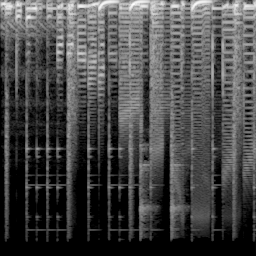

In [14]:
a = dataset[0]["audio"]["array"]  # Get the audio array
pipe.mel.load_audio(raw_audio=a)  # Load it with pipe.mel
pipe.mel.audio_slice_to_image(0)  

In [15]:
sample_rate_dataset = dataset[0]["audio"]["sampling_rate"]
sample_rate_dataset

44100

In [24]:
resampler = AT.Resample(sample_rate_dataset, sample_rate_pipeline, dtype=torch.float32)
to_t = IT.ToTensor()


def to_image(audio_array):
    audio_tensor = torch.tensor(audio_array).to(torch.float32)
    audio_tensor = resampler(audio_tensor)
    pipe.mel.load_audio(raw_audio=np.array(audio_tensor))
    num_slices = pipe.mel.get_number_of_slices()
    slice_idx = random.randint(0, num_slices - 1)  # Pic a random slice each time (excluding the last short slice)
    im = pipe.mel.audio_slice_to_image(slice_idx)
    return im

In [26]:
def collate_fn(examples):
    # to image -> to tensor -> rescale to (-1, 1) -> stack into batch
    audio_ims = [to_t(to_image(x["audio"]["array"])) * 2 - 1 for x in examples]
    return torch.stack(audio_ims)


# Create a dataset with only the 'Chiptune / Glitch' genre of songs
batch_size = 4  # 4 on colab, 12 on A100
chosen_genre = "Electronic"  # <<< Try training on different genres <<<
indexes = [i for i, g in enumerate(dataset["genre"]) if g == chosen_genre]
filtered_dataset = dataset.select(indexes)
dl = torch.utils.data.DataLoader(
    filtered_dataset.shuffle(), batch_size=batch_size, collate_fn=collate_fn, shuffle=True
)
batch = next(iter(dl))
print(batch.shape)

torch.Size([4, 1, 256, 256])


In [32]:
epochs = 3
lr = 1e-4

pipe.unet.train()
pipe.scheduler.set_timesteps(1000)
optimizer = torch.optim.AdamW(pipe.unet.parameters(), lr=lr)

for epoch in range(epochs):
    for step, batch in tqdm(enumerate(dl), total=len(dl)):

        # Prepare the input images
        clean_images = batch.to(device)
        bs = clean_images.shape[0]

        # Sample a random timestep for each image
        timesteps = torch.randint(0, pipe.scheduler.num_train_timesteps, (bs,), device=clean_images.device).long()

        # Add noise to the clean images according to the noise magnitude at each timestep
        noise = torch.randn(clean_images.shape).to(clean_images.device)
        noisy_images = pipe.scheduler.add_noise(clean_images, noise, timesteps)

        # Get the model prediction
        noise_pred = pipe.unet(noisy_images, timesteps, return_dict=False)[0]

        # Calculate the loss
        loss = F.mse_loss(noise_pred, noise)
        loss.backward(loss)

        # Update the model parameters with the optimizer
        optimizer.step()
        optimizer.zero_grad()

In [37]:
pipe = DiffusionPipeline.from_pretrained("johnowhitaker/Electronic_test").to(device)
output = pipe()
display(output.images[0])
display(Audio(output.audios[0], rate=22050))

In [39]:
# Make a longer sample by passing in a starting noise tensor with a different shape
noise = torch.randn(1, 1, pipe.unet.sample_size[0], pipe.unet.sample_size[1] * 4).to(device)
output = pipe(noise=noise)
display(output.images[0])
display(Audio(output.audios[0], rate=22050))